In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
Utrecht = pd.read_csv('Utrecht.csv', encoding='utf-8')
#shufflar vår data så att vi inte får en bias när vi tränar & testar (Ex det är möjligt att stora boytor är längst ner i vår lista)
Utrecht = Utrecht.sample(frac=1,random_state=20241125)
print( Utrecht )

     tomt  bo_yta  balkong    ar  pris
90  168.0  141.75        1  1967   892
29   61.7   68.85        0  1937   466
89  166.6  153.00        1  1959   857
5    97.6  144.00        0  1961   845
1   115.3  111.60        1  1927   649
..    ...     ...      ...   ...   ...
39   63.3  102.60        0  1944   631
17  104.3  106.65        1  2002   601
55  116.2  148.50        1  1992   769
3   102.1  141.75        1  1940   825
21  157.8  220.50        1  1961  1244

[100 rows x 5 columns]


In [51]:
print(Utrecht[Utrecht['balkong']==1]['pris'].describe())
print(Utrecht[Utrecht['balkong']==0]['pris'].describe())

count      81.000000
mean      801.222222
std       185.715845
min       440.000000
25%       671.000000
50%       792.000000
75%       908.000000
max      1339.000000
Name: pris, dtype: float64
count      19.000000
mean      701.736842
std       177.449787
min       466.000000
25%       534.000000
50%       706.000000
75%       790.500000
max      1070.000000
Name: pris, dtype: float64


Adj. R-squared blir sämre om vi tränar med 90 datapunkter jämfört med 80
Vidare förbättrar inte balkong prediktionen, dessutom är 0 inom balkongkoefficientens konfidensintervall

In [57]:
nbr_train_data = 80
#Enkel regression av pris
res = smf.ols(formula='pris~bo_yta+ar+tomt',data=Utrecht[:nbr_train_data])
Utrecht['res'] = res.fit().resid
model =res.fit()
Utrecht['res'] = Utrecht['pris'] - model.predict(Utrecht)
res.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     779.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           5.78e-57
Time:                        11:07:23   Log-Likelihood:                -393.59
No. Observations:                  80   AIC:                             795.2
Df Residuals:                      76   BIC:                             804.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3314.9251    303.942     10.906      0.000    2709.573    3920.278
bo_yta         4.9976      0.124     40.382      0.000       4.751       5.244
ar            -1.6756      0.158    -10.611      0.000      -1.990      -1.361
tomt           0.6822      0.134      5.072      0.000       0.414       0.950
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.166
Skew:                          -0.110   Prob(JB):                        0.920
Kurtosis:                       3.031   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

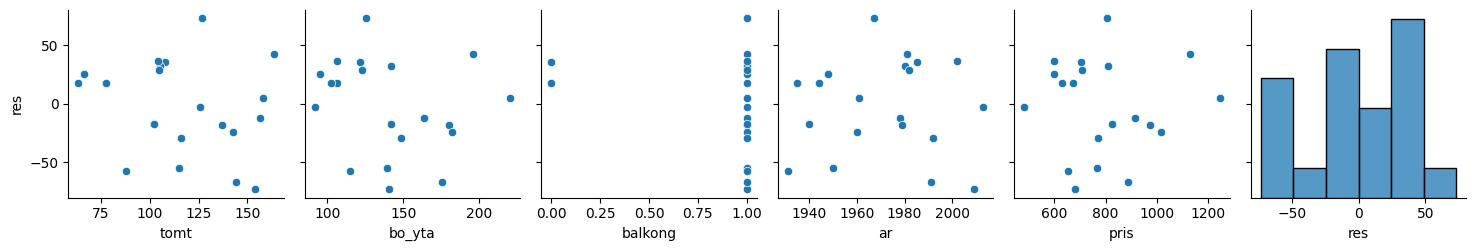

In [58]:
#Visar residualer för vår modell med testdata
sns.pairplot(Utrecht[nbr_train_data:],y_vars='res')

In [59]:
Utrecht.describe()

,tomt,bo_yta,balkong,ar,pris,res
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,112.783000,138.240000,0.810000,1969.460000,782.320000,-0.408917
std,31.858304,37.396767,0.394277,26.554469,187.442699,34.714430
min,54.500000,68.850000,0.000000,1926.000000,440.000000,-76.721313
25%,89.650000,109.350000,1.000000,1946.250000,653.500000,-18.100549
50%,109.400000,137.475000,1.000000,1967.000000,770.500000,2.436859
75%,132.125000,162.450000,1.000000,1991.000000,893.500000,18.954134
max,198.400000,245.250000,1.000000,2017.000000,1339.000000,90.013112
